# Association Rule for Store Dataset

## Load Data

Load data dan tunjukan 5 row pertamanya

Dataset :
https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv

In [105]:
!pip install mlxtend --upgrade

import math
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from mlxtend.frequent_patterns import fpgrowth, apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [106]:
dataset = pd.read_csv("https://raw.githubusercontent.com/GTerrence/dataset/main/Groceries%20data.csv")
dataset.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


<h2> EDA

In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [108]:
dataset.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [109]:
dataset.duplicated().sum()

759

In [110]:
dataset = dataset.drop_duplicates()

In [111]:
dataset.duplicated().sum()

0

In [112]:
dataset.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

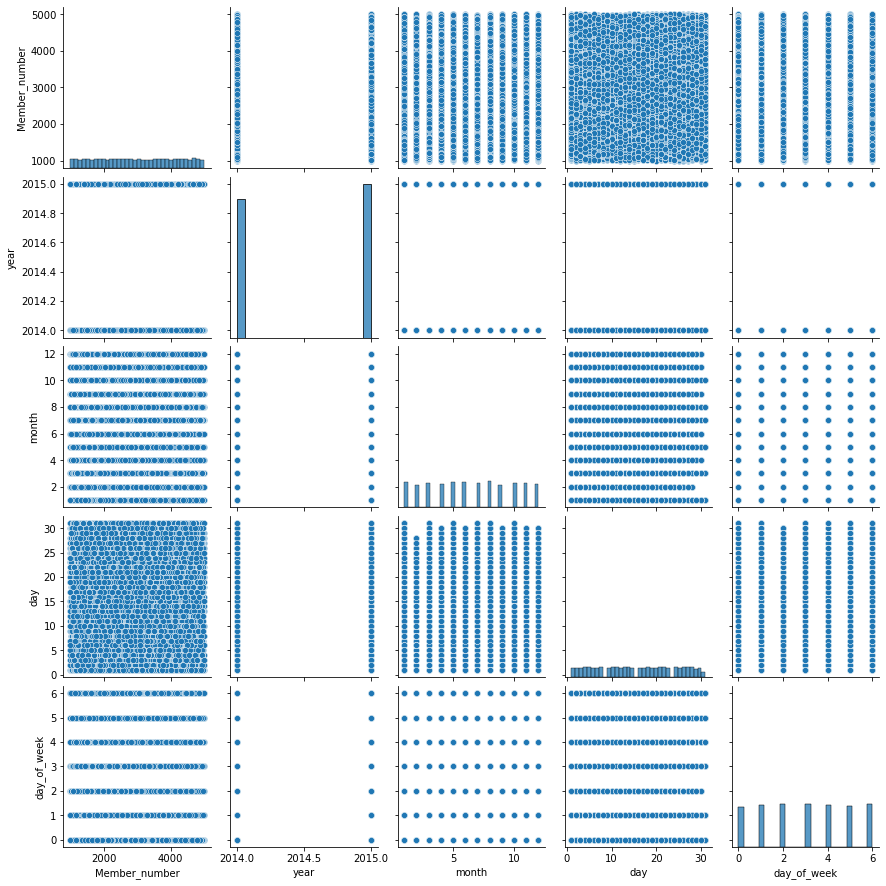

In [113]:
sns.pairplot(dataset)

<h2> Data Preprocessing

Ubahlah dataset di atas menjadi bentuk one hot encoding. Asumsikanlah bahwa pembelian barang yang dilakukan oleh Customer ID yang sama dalam hari yang sama terjadi dalam 1 transaksi yang sama (satu Order ID)

contoh :
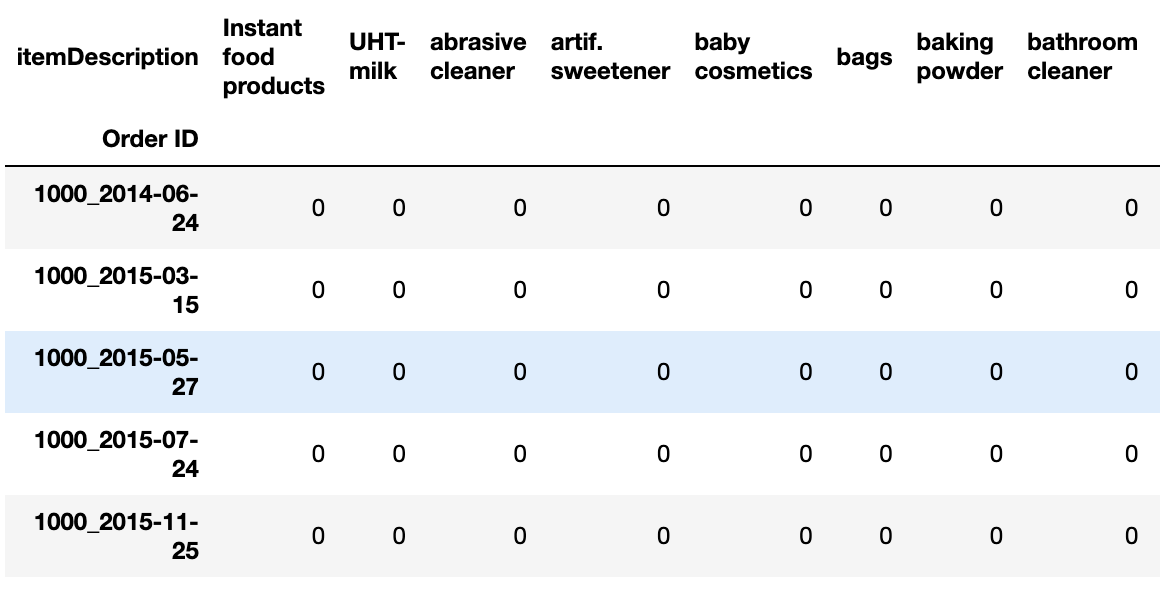

In [114]:
dataset['Order ID'] = dataset['Member_number'].astype(str) +"_"+ dataset["Date"].astype(str)
dataset.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,Order ID
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1808_2015-07-21
1,2552,2015-05-01,whole milk,2015,5,1,4,2552_2015-05-01
2,2300,2015-09-19,pip fruit,2015,9,19,5,2300_2015-09-19
3,1187,2015-12-12,other vegetables,2015,12,12,5,1187_2015-12-12
4,3037,2015-01-02,whole milk,2015,1,2,4,3037_2015-01-02


In [115]:
def getProductList(row):
  return [product for product in row.unique()]

data = dataset[['Order ID', 'itemDescription']].groupby('Order ID').agg(getProductList).reset_index()
cols = data['Order ID']
vals = data['itemDescription']

In [116]:
te = TransactionEncoder()
arr = te.fit(vals).transform(vals)
df = pd.DataFrame(arr, columns = te.columns_)
df.insert(0, 'Order ID', cols)
df.head()

,Order ID,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000_2014-06-24,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1000_2015-03-15,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,1000_2015-05-27,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1000_2015-07-24,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1000_2015-11-25,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori Algorithm

Gunakanlah algroitma apriori untuk mencari tahu produk mana yang sering dibeli secara bersama-sama (min support = 0.01)

In [117]:
from mlxtend.frequent_patterns import apriori, association_rules
df.drop('Order ID', axis = 1, inplace = True)
frq_items = apriori(df, min_support = 0.01, use_colnames = True)
frq_items

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)
...,...,...
64,0.010559,"(other vegetables, rolls/buns)"
65,0.014837,"(whole milk, other vegetables)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.011629,"(whole milk, soda)"


Berdasarkan hasil di atas, buatlah association rules nya dengan syarat min confidence = 0.1 

In [118]:
rules = association_rules(frq_items, metric ="confidence", min_threshold = 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
1,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
2,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
3,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
